In [1]:
#Time series Forecasting using ARIMA model

In [23]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
def parser(x):
    return datetime.strptime(x,'%Y-%m')
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [24]:
sales = pd.read_csv("/Users/vishwapatel/Downloads/sales-cars.csv",index_col=0,parse_dates=[0],date_parser=parser)

In [25]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


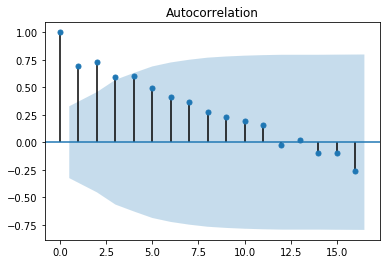

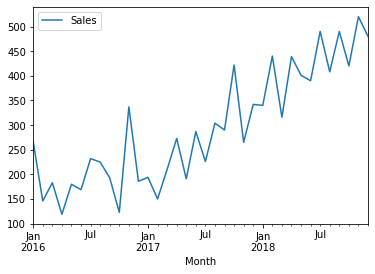

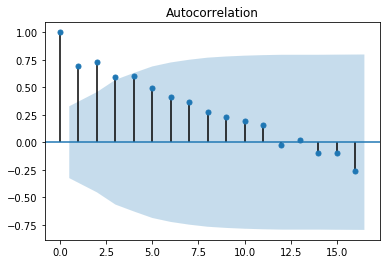

In [30]:
sales.plot()

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

In [31]:
## converting to Stationary :
##mean,variance and covariance is constant over a period

In [32]:
sales_diff = sales.diff(periods=1)

In [33]:
sales_diff = sales_diff[1:]

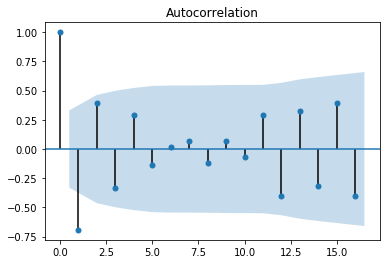

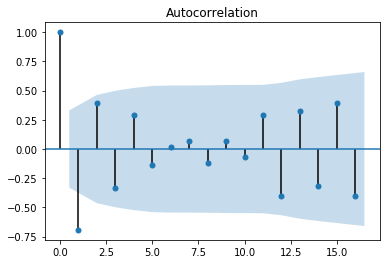

In [35]:
plot_acf(sales_diff)

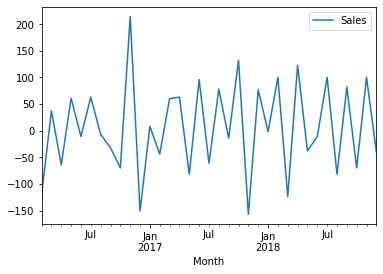

In [36]:
sales_diff.plot()

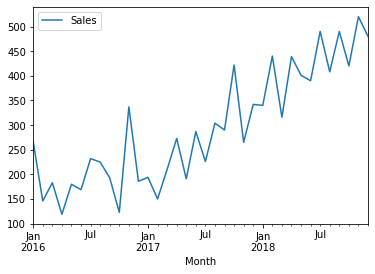

In [37]:
sales.plot()

In [38]:
##Autoregressive model (AR)

from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [40]:
X = sales.values
train = X[0:27]
test = X[27:]

In [42]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [48]:
predictions = model_ar_fit.predict(start=27,end=36)

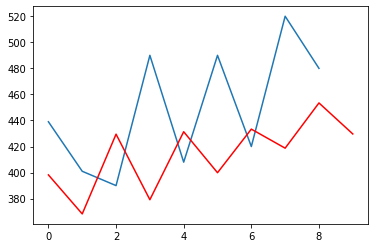

In [52]:
plt.plot(test)
plt.plot(predictions,color='red')

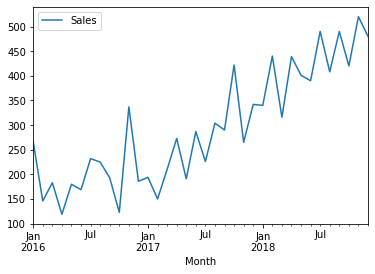

In [53]:
sales.plot()

In [122]:
##ARIMA MODEL

from statsmodels.tsa.arima_model import ARIMA
model_arima = ARIMA(train,order=(4,2,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

291.3991344717372


In [123]:
predictions = model_arima_fit.forecast(steps=10)[0]
predictions

array([419.86217908, 399.60376833, 480.05785548, 431.16699387,
       488.80134772, 488.07662564, 543.45030469, 535.49540089,
       575.01639949, 586.85567777])

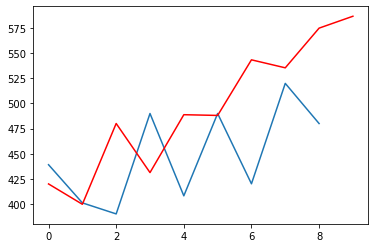

In [124]:
plt.plot(test)
plt.plot(predictions,color='red')

In [89]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [100]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.72448093894775
(0, 0, 2) 315.25060028736823
(0, 0, 3) nan
(0, 0, 4) 310.166932857633
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.08415381062906
(0, 1, 2) 296.3229226907679
(0, 1, 3) 298.3120211739366
(0, 1, 4) 300.3393975617894
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.10194741083694
(0, 2, 2) 290.39835443517234
(0, 2, 3) 292.9858910867966
(1, 0, 0) 316.16687175281163
(1, 0, 1) 313.0487174408613
(1, 0, 2) 310.97906422827
(1, 1, 0) 298.83254422707273
(1, 1, 1) 297.1256511258505
(1, 1, 2) 299.4716667062747
(1, 1, 3) 301.2851180948011
(1, 1, 4) 299.97873239707246
(1, 2, 0) 306.53077675708374
(2, 0, 0) 310.996957362129
(2, 0, 1) 340.3100624725141
(2, 0, 4) 350.751778546634
(2, 1, 0) 300.2089561239981
(2, 1, 1) 297.9999930167491
(2, 1, 2) 298.5505428130232
(2, 1, 3) 302.87208314763
(2, 2, 0) 306.2975856431996
(3, 0, 0) 312.9838587440775
(3, 0, 1) 335.07465949815673
(3, 1, 0) 294.8543584218757
(3, 1, 1) 295.9979353418416
(3, 1, 2) 292.6686238693999
(3

[]